In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('Final.csv')

In [3]:
df

,Year,Annual CO2 emissions,Primary energy consumption per GDP (kWh/$),Oil Consumption - TWh,GDP
0,1965,153867847,1.039235,146.995132,5.960000e+11
1,1966,159540062,1.061502,164.149689,6.010000e+11
2,1967,159725507,1.011860,169.360230,6.510000e+11
3,1968,174245743,1.053523,189.770889,6.680000e+11
4,1969,177589111,1.095252,227.928833,7.130000e+11
5,1970,181898660,1.020029,226.891449,7.490000e+11
6,1971,192144566,1.051254,243.332459,7.560000e+11
7,1972,203227421,1.109238,262.383270,7.540000e+11
8,1973,209291369,1.081800,276.959076,7.890000e+11
9,1974,216060663,1.134249,271.542969,7.970000e+11


In [4]:
X=df.drop('Oil Consumption - TWh', axis=1)

In [5]:
y=df['Oil Consumption - TWh']

In [6]:
"""import numpy as np
from sklearn.model_selection import KFold


kf = KFold(n_splits=7,random_state=1,shuffle=True)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
scores=cross_val_score(model)
for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]"""

'import numpy as np\nfrom sklearn.model_selection import KFold\n\n\nkf = KFold(n_splits=7,random_state=1,shuffle=True)\nfrom sklearn.linear_model import LinearRegression\nmodel = LinearRegression()\nscores=cross_val_score(model)\nfor train_index, test_index in kf.split(X):\n    print("TRAIN:", train_index, "TEST:", test_index)\n    X_train, X_test = X[train_index], X[test_index]\n    y_train, y_test = y[train_index], y[test_index]'

In [7]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [9]:
y_pred = model.predict(X_test)

In [10]:
y_pred

array([ 898.44235936,  157.39777965, 1772.59114341, 1000.71606291,
        974.18944706, 2056.96236896, 1110.55932254, 1422.76356857,
       1941.78816317,  525.72077316,  309.26934109,  165.05661941,
        576.72037642, 2352.76751305, 1355.09172362, 1587.17519079,
        687.52283304])

In [11]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2


0.9956344128074623

In [12]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
np.sqrt(mean_squared_error(y_test, y_pred))

43.08477779010493

In [13]:
from sklearn.model_selection import cross_val_score,cross_validate
# scores=cross_val(model,X_train,y_train,scoring='r2',cv=10)
# scores
scores=cross_validate(model,X_train,y_train,scoring=['r2'],cv=10)
scores
pd.DataFrame(scores)

,fit_time,score_time,test_r2
0,0.001994,0.001995,0.984925
1,0.002993,0.000998,0.995577
2,0.002992,0.001035,0.971760
3,0.001958,0.000997,0.977096
4,0.000997,0.000997,0.984501
5,0.001995,0.000998,0.998745
6,0.000996,0.000999,0.997545
7,0.000997,0.000998,0.834740
8,0.000997,0.000998,-1.123279
9,0.000997,0.000998,0.987067


In [14]:
mean_absolute_percentage_error(y_test, y_pred)

0.04579205901297457

In [15]:
training_data = pd.concat([X_train, y_train], axis=1)
training_data.sort_values('Year')

,Year,Annual CO2 emissions,Primary energy consumption per GDP (kWh/$),GDP,Oil Consumption - TWh
0,1965,153867847,1.039235,5.960000e+11,146.995132
1,1966,159540062,1.061502,6.010000e+11,164.149689
4,1969,177589111,1.095252,7.130000e+11,227.928833
5,1970,181898660,1.020029,7.490000e+11,226.891449
6,1971,192144566,1.051254,7.560000e+11,243.332459
7,1972,203227421,1.109238,7.540000e+11,262.383270
8,1973,209291369,1.081800,7.890000e+11,276.959076
9,1974,216060663,1.134249,7.970000e+11,271.542969
11,1976,244990017,1.160396,8.790000e+11,293.258697
12,1977,259214620,1.138434,9.470000e+11,315.044037


In [16]:
testing_data = pd.concat([X_test, y_test], axis=1)
testing_data.sort_values('Year')

,Year,Annual CO2 emissions,Primary energy consumption per GDP (kWh/$),GDP,Oil Consumption - TWh
2,1967,159725507,1.011860,6.510000e+11,169.360230
3,1968,174245743,1.053523,6.680000e+11,189.770889
10,1975,234438971,1.119816,8.680000e+11,278.092834
19,1984,361889225,1.201783,1.250000e+12,477.067017
21,1986,426698557,1.253111,1.350000e+12,544.259460
24,1989,541134880,1.288320,1.660000e+12,667.772644
30,1995,762120642,1.364837,2.170000e+12,901.351685
31,1996,825918856,1.326156,2.320000e+12,972.761353
32,1997,859686238,1.353248,2.400000e+12,1039.855713
34,1999,951748674,1.323784,2.680000e+12,1222.578979


Text(0.5, 1.0, 'Training data')

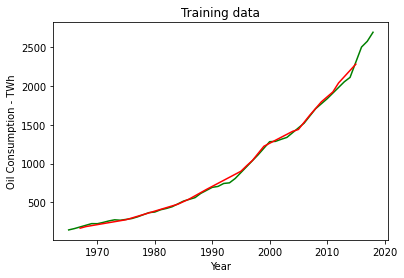

In [17]:
sns.lineplot(data=training_data, x='Year', y='Oil Consumption - TWh', color='green')
sns.lineplot(data=testing_data, x='Year', y='Oil Consumption - TWh', color='red')
#sns.lineplot(data=np.sort(y_pred),color='blue')
# sns.lineplot(data=y_pred,color='yellow',x='Year', y='Oil Consumption - TWh
plt.title('Training data')

<AxesSubplot:>

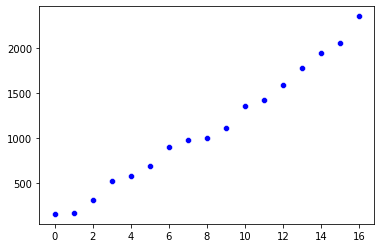

In [18]:
sns.scatterplot(data=np.sort(y_pred),color='blue')

In [19]:
axis=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]


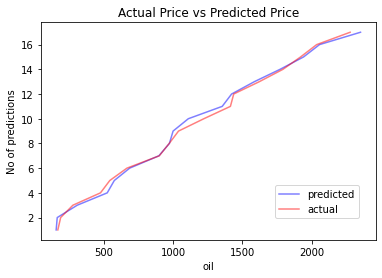

In [20]:
fig, ax = plt.subplots()
plt.plot(np.sort(y_pred),axis,label='predicted',alpha=0.5,color='blue')
plt.plot(np.sort(y_test),axis, label='actual',alpha=0.5,color='red')
plt.xlabel("oil")
plt.ylabel("No of predictions")
plt.title('Actual Price vs Predicted Price')
ax.legend(loc=(0.7, 0.1))
plt.show()

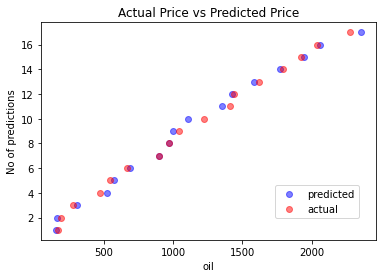

In [21]:
fig, ax = plt.subplots()
plt.scatter(np.sort(y_pred),axis,label='predicted',alpha=0.5,color='blue')
plt.scatter(np.sort(y_test),axis, label='actual',alpha=0.5,color='red')
plt.xlabel("oil")
plt.ylabel("No of predictions")
plt.title('Actual Price vs Predicted Price')
ax.legend(loc=(0.7, 0.1))
plt.show()

In [22]:
y_pred

array([ 898.44235936,  157.39777965, 1772.59114341, 1000.71606291,
        974.18944706, 2056.96236896, 1110.55932254, 1422.76356857,
       1941.78816317,  525.72077316,  309.26934109,  165.05661941,
        576.72037642, 2352.76751305, 1355.09172362, 1587.17519079,
        687.52283304])

In [23]:
X_test


,Year,Annual CO2 emissions,Primary energy consumption per GDP (kWh/$),GDP
30,1995,762120642,1.364837,2.170000e+12
2,1967,159725507,1.011860,6.510000e+11
44,2009,1612816599,1.213822,4.950000e+12
32,1997,859686238,1.353248,2.400000e+12
31,1996,825918856,1.326156,2.320000e+12
47,2012,1963586045,1.184675,5.950000e+12
34,1999,951748674,1.323784,2.680000e+12
40,2005,1185953364,1.241076,3.710000e+12
46,2011,1780129996,1.171794,5.680000e+12
19,1984,361889225,1.201783,1.250000e+12


In [24]:
import statsmodels.api as sm
x = sm.add_constant(X)
 
# performing the regression
# and fitting the model
result = sm.OLS(y, x).fit()
 
# printing the summary table
print(result.summary())

                              OLS Regression Results                             
Dep. Variable:     Oil Consumption - TWh   R-squared:                       0.990
Model:                               OLS   Adj. R-squared:                  0.989
Method:                    Least Squares   F-statistic:                     1610.
Date:                   Sat, 10 Sep 2022   Prob (F-statistic):           1.05e-49
Time:                           12:02:33   Log-Likelihood:                -308.27
No. Observations:                     54   AIC:                             624.5
Df Residuals:                         50   BIC:                             632.5
Df Model:                              3                                         
Covariance Type:               nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

In [25]:

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [26]:
fvalue_Best = SelectKBest(f_classif, k=2)
X_kbest = fvalue_Best.fit_transform(X, y)
print(X_kbest)

print('Original number of features:', X.shape)
print('Reduced number of features:', X_kbest.shape)

[[1.03923476e+00 5.96000000e+11]
 [1.06150198e+00 6.01000000e+11]
 [1.01186001e+00 6.51000000e+11]
 [1.05352318e+00 6.68000000e+11]
 [1.09525192e+00 7.13000000e+11]
 [1.02002931e+00 7.49000000e+11]
 [1.05125391e+00 7.56000000e+11]
 [1.10923803e+00 7.54000000e+11]
 [1.08179987e+00 7.89000000e+11]
 [1.13424921e+00 7.97000000e+11]
 [1.11981583e+00 8.68000000e+11]
 [1.16039574e+00 8.79000000e+11]
 [1.13843381e+00 9.47000000e+11]
 [1.12330925e+00 9.98000000e+11]
 [1.24846864e+00 9.48000000e+11]
 [1.20046592e+00 1.02000000e+12]
 [1.25230122e+00 1.08000000e+12]
 [1.20195854e+00 1.11000000e+12]
 [1.16858769e+00 1.20000000e+12]
 [1.20178282e+00 1.25000000e+12]
 [1.21997750e+00 1.30000000e+12]
 [1.25311089e+00 1.35000000e+12]
 [1.27600980e+00 1.41000000e+12]
 [1.25781310e+00 1.56000000e+12]
 [1.28831983e+00 1.66000000e+12]
 [1.31394088e+00 1.75000000e+12]
 [1.37746656e+00 1.76000000e+12]
 [1.38559866e+00 1.84000000e+12]
 [1.35425651e+00 1.93000000e+12]
 [1.35184503e+00 2.04000000e+12]
 [1.364837

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:109: RuntimeWarning: invalid value encountered in divide
  msw = sswn / float(dfwn)
